<a href="https://colab.research.google.com/github/aleks-haksly/KarpovCources_Hard_DA_advanced/blob/main/03%20-%20Advanced%20experiments%20design/03_samples_srm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1 ##
Разделите пользователей на две группы по размеру выручки:
* платящие (revenue > 0) и
* неплатящие (revenue = 0).

Добавьте эту информацию в новый столбец 'vas'. Найдите среднюю по всему датасету долю платящих.
Введите ответ в поле ниже с точностью до ТРЕХ знаков в десятичной части.

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('homework_task_2.csv')
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as ss

In [ ]:
# Проверим качество имебщихся у нас данных
data.isna().sum()
# Видим, что в данных есть пропуски. В данном случае строки с пропусками необходимо удалить.

passport_id               0
region                 3470
platform               3470
user_type_cars_name    6472
number_ads                0
revenue                   0
dtype: int64

In [ ]:
# Удаляем строки с провусками в любых полях
data.dropna(axis=0, how='any', subset=None, inplace=True)
# Проверяем, что удаление прошло успешно
data.isna().sum()

passport_id            0
region                 0
platform               0
user_type_cars_name    0
number_ads             0
revenue                0
dtype: int64

In [ ]:
data['vas'] = np.where(data.revenue > 0, 1, 0)
print('Доля платаящих пользователей составляет %s' % round(data.vas.mean(), 3))

Доля платаящих пользователей составляет 0.523


## Задание 2 (1/4) ##
Получите случайную стратифицированную выборку размером ~5% от исходного датасета homework_task_2 (уже очищенного от данных с пропусками). Для формирования выборки используйте параметр frac = 0.05.

Необходимо стратифицировать выборку по следующим параметрам ['region', 'platform', 'user_type_cars_name', 'vas'], сохранив соотношения как в исходном датасете. Порядок указания параметров, по которым мы стратифицируем, стоит оставить таким же, как в задании.

При формировании стратифицированной выборки используйте np.random.seed(42), чтобы у всех получился одинаковый датасет.

In [ ]:
# Мой вариант
sample_1 = data.groupby(['region', 'platform', 'user_type_cars_name', 'vas'], as_index=False).sample(frac=0.05, replace=False, random_state=42)

In [ ]:
# Из лекции
sample_2 = (data.groupby(['region', 'platform', 'user_type_cars_name', 'vas'], group_keys = False)
                    .apply(lambda x: x.sample(frac=0.05, replace=False, random_state=42)))

## Задание 2 (2/4) ##
Найдите размер полученной выборки.

In [ ]:
print("размер полученной выборки %s" % smaple_1.shape[0])

размер полученной выборки 6478


## Задание 2 (3/4) ##
Найдите средний процент платящих пользователей по стратифицированной выборке.

Введите ответ в поле ниже с точностью до трех знаков в десятичной части.

In [ ]:
print("средний процент платящих пользователей по стратифицированной выборке составляет {0:.3%}".format(sample_2.vas.mean(), ))

средний процент платящих пользователей по стратифицированной выборке составляет 52.207%


In [ ]:
round(sample_1.vas.mean()*100, 3)

52.207

## Задание 2 (4/4) ##
Найдите долю платформы android в стратифицированной выборке.

Введите ответ в поле ниже с точностью до трех знаков в десятичной части.

In [ ]:
print("доля платформы android в стратифицированной выборке {:.3f}".format(np.where(sample_1.platform == 'android', 1, 0).mean()))

доля платформы android в стратифицированной выборке 0.642


In [ ]:
sample_1.platform.value_counts(normalize=True)

platform
android    0.642482
ios        0.337913
desktop    0.019296
mobile     0.000309
Name: proportion, dtype: float64

## Задание 3 (1/3) ##
Проверьте полученную выборку на репрезентативность по нескольким параметрам:

* по параметру неплатящих пользователей (выборка['vas'] = 0);

* по платформе Андроид (выборка['platform'] = 'android');

* по типу профессионального кабинета cars_seller (выборка['user_type_cars_name'] = 'cars_seller').

Введите значение p-value через z-тест с точностью до трех знаков в десятичной части для каждого из параметров в этом и следующих степах.

p-value для проверки по параметру неплатящих пользователей:

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
#  число соответствующих требованиям записей в генеральной совокупности
#population_ratio = data.query('vas == 0 and platform == "android" and user_type_cars_name == "cars_seller"')['vas'].count() / data.shape[0]
population_count = data.query('vas == 0')['vas'].count()
#  число соответствующих требованиям записей в стратифицированной выборке
sample_1_count =  sample_1.query('vas == 0')['vas'].count()

In [ ]:
stat, pval = proportions_ztest(count = [sample_1_count, population_count], nobs = [sample_1.shape[0], data.shape[0]])
print("p-value для проверки по параметру неплатящих пользователей %s" % round(pval, 3))

p-value для проверки по параметру неплатящих пользователей 0.928


## Задание 3 (2/3) ##
p-value для проверки по платформе Андроид:

In [ ]:
population_count = data.query('platform == "android"')['vas'].count()
sample_1_count =  sample_1.query('platform == "android"')['vas'].count()
stat, pval = proportions_ztest(count = [sample_1_count, population_count], nobs = [sample_1.shape[0], data.shape[0]])
print("p-value для проверки по платформе Андроид: %s" % round(pval, 3))

p-value для проверки по платформе Андроид: 0.836


## Задание 3 (3/3) ##
p-value для проверки по типу профессионального кабинета:

In [ ]:
population_count = data.query('user_type_cars_name == "cars_seller"')['vas'].count()
sample_1_count =  sample_1.query('user_type_cars_name == "cars_seller"')['vas'].count()
stat, pval = proportions_ztest(count = [sample_1_count, population_count], nobs = [sample_1.shape[0], data.shape[0]])
print("p-value для проверки по типу профессионального кабинета: %s" % round(pval, 3))

p-value для проверки по типу профессионального кабинета: 0.843


## Задание 4 ##
Переходим к работе с новым датасетом (homework_task_3.csv, скачать данные можно в первом степе). В предложенном датасете пользователи разбиты на контрольную (А) и тестовую группы (B).

Дизайном эксперимента предполагается, что группы представлены в равных пропорциях. Проверьте, присутствует ли в данных нарушение сплитования (SRM) с помощью критерия chi-квадрат.

Присутствует ли нарушение SRM согласно chi-квадрат критерию на уровне значимости alpha = 0.05:

In [ ]:
# загрузим данные и проверим число наблюдений отнесенных к каждой группе
data = pd.read_csv('homework_task_3.csv')
data.group.value_counts()
# уже заметен сильный дисбаланс, но проверим точно с помощью chi_2

group
['B']    14270
['A']    11748
Name: count, dtype: int64

In [ ]:
# текущее число пользователей в тестовой и контрольной группах
observed = [data.group.value_counts()[0], data.group.value_counts()[1]]

# соотношение между двумя группами (достаточно % для одной из групп)
ratio = 0.5

# уровень значимости
alpha = 0.05

In [ ]:
# ожидаемые значения в случае групп в равных пропорциях
expected = sum(observed)*np.array([0.5, 1 - ratio])

In [ ]:
# вычислим p_value
stat, p_value = ss.chisquare(observed, f_exp = expected)

In [ ]:
# Вывод о Sample Ratio Mismatch (SRM)
print("SRM не наблюдается, p-value=%s" % p_value if p_value > alpha else "наблюдается SRM, p-value=%s" % p_value)

наблюдается SRM, p-value=4.180479887875548e-55


In [ ]:
# 'Отклоняем H0 о равенстве числа пользователей в обеих группах. SRM присутствует

## Задание 5 ##
Используя метод SSRM, рассмотренный в лекции, определите, на каком числе пользователей метод позволит сказать о присутствии SRM для датасета из предыдущего задания.

Для выполнения задания нужно установить модуль !pip install ssrm-test -q

In [ ]:
!pip install ssrm-test

In [ ]:
from ssrm_test import ssrm_test
import seaborn as sns

In [ ]:
# приведем разбитие выборки на группы к виду, кторый требует библиотека ssrm_test
data = [[1, 0] if value == "['A']" else [0, 1] for value in data.group]
# ожидаемое соотношение групп
p = [0.5, 0.5]

In [ ]:
pvals = ssrm_test.sequential_p_values(data, [0.5, 0.5])

Text(22000, 0.07, 'alpha = 0.05')

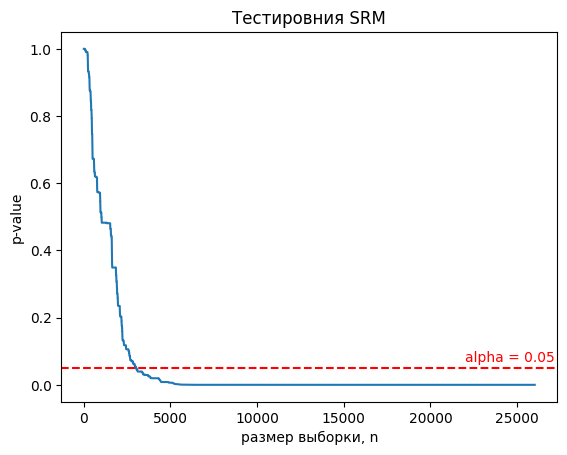

In [ ]:
plot = sns.lineplot(x=range(1, len(pvals)+1), y=pvals)
plot.set(xlabel='размер выборки, n', ylabel='p-value', title='Тестировния SRM')
plot.axhline(0.05, color='r', linestyle='--')
plot.text(22_000, 0.07,'alpha = 0.05', color='r')

In [ ]:
print("На %s пользователе" % np.argmax(np.array(pvals) < 0.05))

На 3023 пользователе
